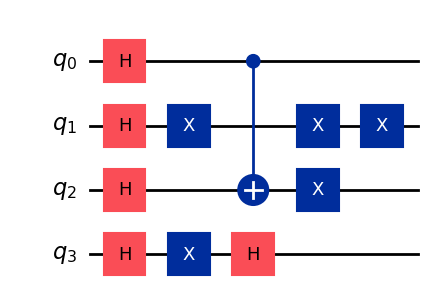

In [1]:
from qiskit import QuantumCircuit
from qiskit.transpiler.passes import RemoveBarriers

n_nodes = 4

debug_circuit = QuantumCircuit(n_nodes)
debug_circuit.h(range(n_nodes))
debug_circuit.x(1)
debug_circuit.x(1)
debug_circuit.x(1)
debug_circuit.x(3)
debug_circuit.h(3)
debug_circuit.cx(0, 2)
#debug_circuit.barrier()
debug_circuit.x(2)
debug_circuit.draw('mpl')


remove_barriers = RemoveBarriers()
debug_removed = remove_barriers(debug_circuit)
debug_removed.draw('mpl')

In [2]:
from Data.data_preprocessing import QuantumCircuitGraph

qcg = QuantumCircuitGraph(debug_circuit)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\qiskit-env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\qiskit-env\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\melan\shared-folder\Thesis\SSL-fo

In [3]:
qcg.node_positions

{'h_0_8': (0, 0),
 'h_1_9': (0, -1),
 'h_2_13': (0, -2),
 'h_3_16': (0, -3),
 'x_1_10': (1, -1),
 'cx_0_control_14': (1, 0),
 'cx_2_target_14': (1, -2),
 'x_3_17': (1, -3),
 'x_1_11': (2, -1),
 'x_2_15': (2, -2),
 'h_3_18': (2, -3),
 'x_1_12': (3, -1)}

In [4]:
qcg.graph.edges(data = True)

EdgeDataView([('h_0_8', 'cx_0_control_14', {'type': 'qubit', 'create_using': <networkx.classes.digraph.DiGraph object at 0x00000183EEC66050>}), ('h_1_9', 'x_1_10', {'type': 'qubit', 'create_using': <networkx.classes.digraph.DiGraph object at 0x00000183EEC65B50>}), ('h_2_13', 'cx_2_target_14', {'type': 'qubit', 'create_using': <networkx.classes.digraph.DiGraph object at 0x00000183EEC66210>}), ('h_3_16', 'x_3_17', {'type': 'qubit', 'create_using': <networkx.classes.digraph.DiGraph object at 0x00000183EEC66510>}), ('x_1_10', 'x_1_11', {'type': 'qubit', 'create_using': <networkx.classes.digraph.DiGraph object at 0x00000183EEC66790>}), ('cx_0_control_14', 'cx_2_target_14', {'type': 'cx'}), ('cx_2_target_14', 'x_2_15', {'type': 'qubit', 'create_using': <networkx.classes.digraph.DiGraph object at 0x00000183EEC66A50>}), ('x_3_17', 'h_3_18', {'type': 'qubit', 'create_using': <networkx.classes.digraph.DiGraph object at 0x00000183EEC66D50>}), ('x_1_11', 'x_1_12', {'type': 'qubit', 'create_using':

In [5]:
qcg.graph.edges[('cx_0_control_14', 'cx_2_target_14')]['type']

'cx'

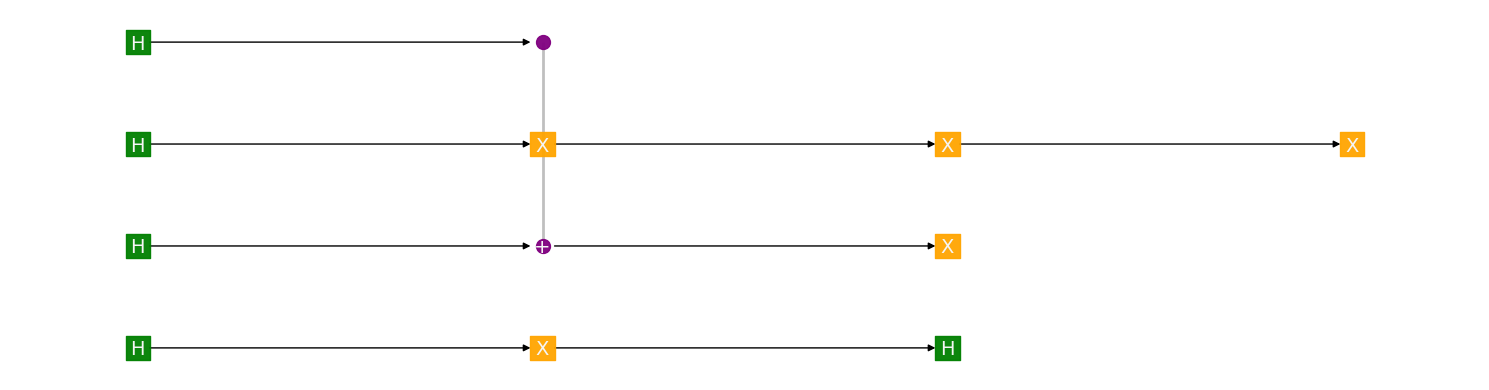

In [6]:
qcg.draw()

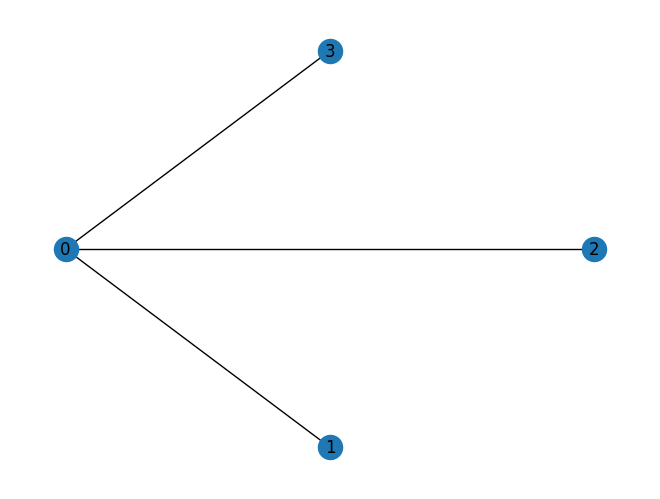

In [7]:
import networkx as nx

n_nodes = 4
G = nx.star_graph(n_nodes - 1)

# pos serve solo per disegnare il grafo con una certa disposizione di nodi e archi, si può cambiare
nx.draw(G, pos=nx.shell_layout(G), with_labels=True)

In [8]:
from Data.problems import *
from Data.qaoa import QUBO

adjacency = nx.to_numpy_array(G) 
maxCut_instance = MaxCut(n_nodes)

qubo_maxCut_instance = maxCut_instance.compute_qubo(adjacency)
print(qubo_maxCut_instance.Q)

[[-3.  1.  1.  1.]
 [ 1. -1.  0.  0.]
 [ 1.  0. -1.  0.]
 [ 1.  0.  0. -1.]]


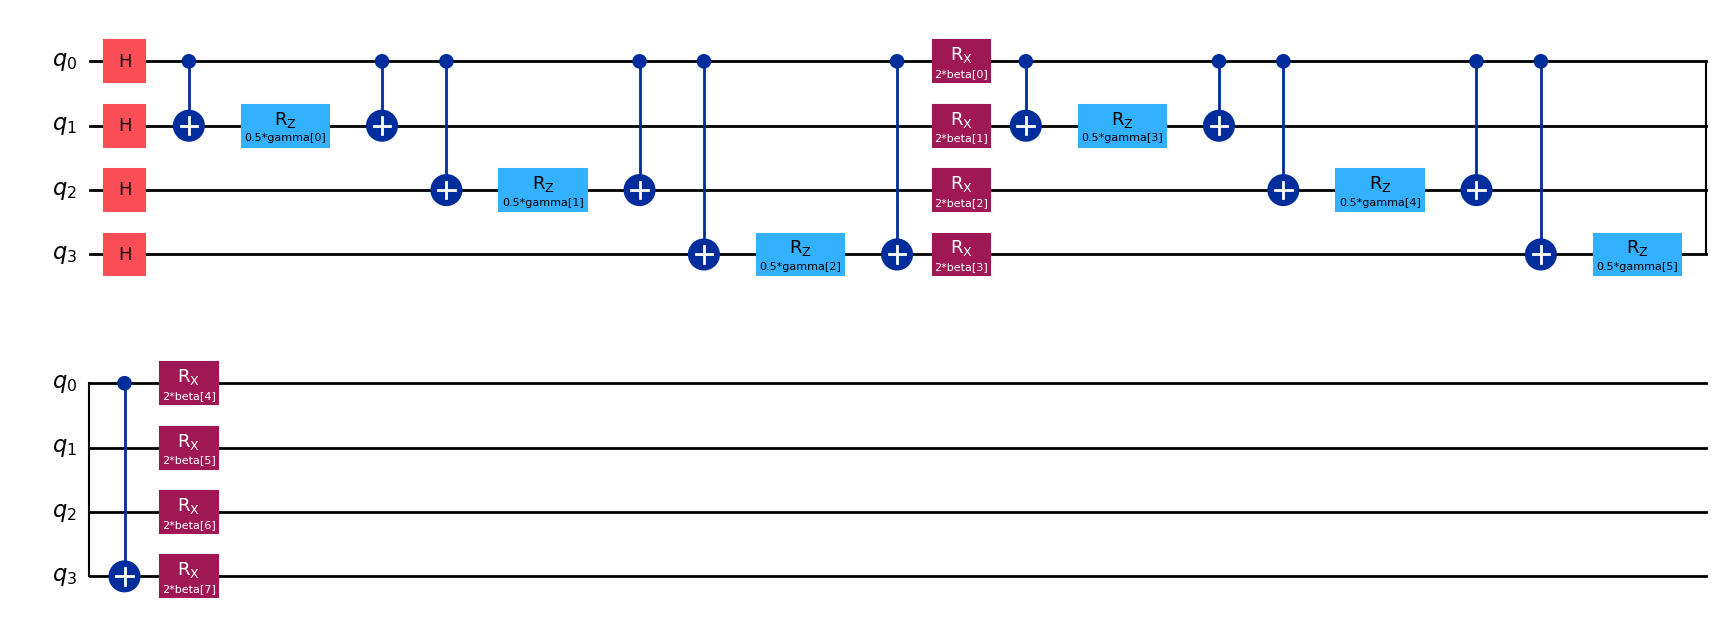

In [9]:
from Data.qaoa import qaoa_composer

circuit, gamma, beta = qaoa_composer(qubo_maxCut_instance, n_layers=2, put_barriers=True)
circuit.draw('mpl', plot_barriers=False)

In [10]:
max_cut_graph = QuantumCircuitGraph(circuit)

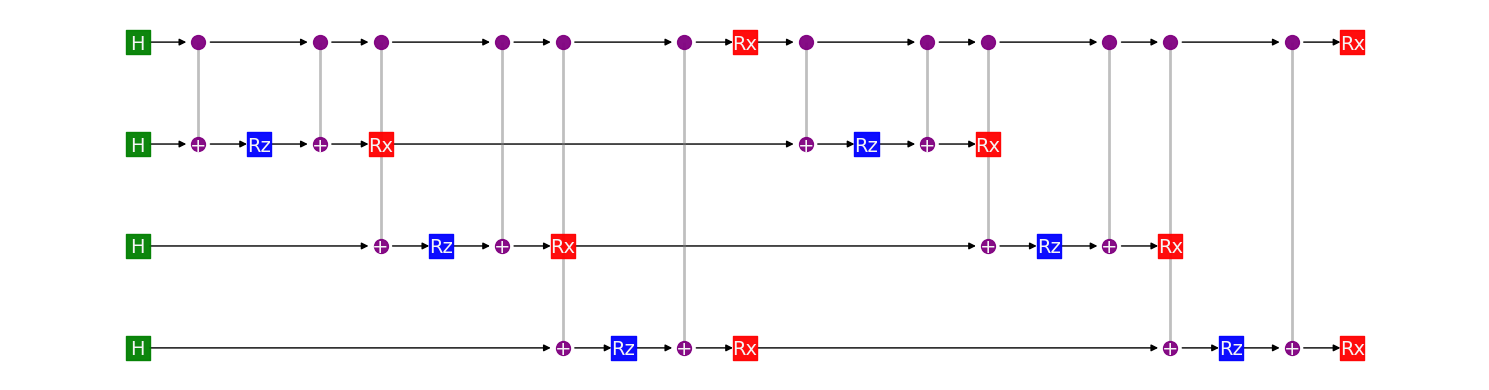

In [11]:
max_cut_graph.draw()